## Adding labels to Seaborn plots

**AIM**: This workbook describes how to include labels to Seaborn line charts

### 1. Load required libraries

In [1]:
# Pandas and os for data ingestion and file manipulation
import pandas as pd
import os

Loading also specific Seaborn libraries

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt 
sns.set_theme(style="darkgrid")

### 2. Build path to project folder 

In this section, I build the path to the \data project folder where I can load any .xlsx or .csv file into Python.

In [3]:
my_wd = os.getcwd()
print("My working directory is:",my_wd)

My working directory is: /home/pablo/Documents/Pablo_zorin/VS_Python_GitHub_Pablo_source/ML-using-Python/Seaborn_gallery


- I need to change default WD to ML-using-Python folder to access \data sub-folder to ingest Excel file called "INE total and foreign population figures Spain.xlsx"

In [4]:
ML_using_Python_folder = os.path.join('/home','pablo','Documents','Pablo_zorin','VS_Python_GitHub_Pablo_source','ML-using-Python')
print('My Python project folder is:',ML_using_Python_folder)

My Python project folder is: /home/pablo/Documents/Pablo_zorin/VS_Python_GitHub_Pablo_source/ML-using-Python


- Then change default folder to this /ML-using-Python folder

In [5]:
os.chdir(ML_using_Python_folder)


In [6]:
new_wd = os.getcwd()
print("Changed default working directory to:",new_wd)

Changed default working directory to: /home/pablo/Documents/Pablo_zorin/VS_Python_GitHub_Pablo_source/ML-using-Python


### 3. Check data folder file contents

- Check file contents from \data folder and build path to Excel file to be imported into python 

In [7]:
data_folder = os.path.join('/home','pablo','Documents','Pablo_zorin','VS_Python_GitHub_Pablo_source','ML-using-Python','data')
data_folder_contents = os.listdir(data_folder)
print('data folder contents:',data_folder_contents)

data folder contents: ['wine_quality.zip', 'winequality.names', 'Monthly-AE-Time-Series-January-2024.xls', 'INE Resident population country of birth Spain.xlsx', 'AE_Time_Series_Data_website.txt', 'winequality-red.csv', 'OCDE_countries_population_figures_1970_2022.csv', 'all_wine_reset.csv', '03_INE_Spain_natural_growh_births_deaths.xlsx', '02 INE Spain CV population stocks and flows 2002 2025.xlsx', 'AE_Attendances_TypeI_2010_2025.csv', 'AE_Attendances_Aug2010_Mar_2025.csv', 'Monthly-AE-Time-Series-March-2025.xls', 'AE_Attendances_2010_2024.csv', 'Type_I_ATT_TEST.csv', 'Type_I_ATT_TRAIN.csv', 'ONS_Figure_2__Population_increase_in_mid-2023_was_driven_mostly_by_net_international_migration.xls', 'winequality-white.csv', 'INE total and foreign population figures Spain.xlsx', 'monthly-milk-production-pounds.csv', 'ONS_Figure_01_Long_term_emigration_immigration_net_migration.xlsx', 'ONS_long_term_immigration_end2024.xlsx', '01 INE resident population by nationality Spain and CV 2002 2024.xl

#### 3.1 I want to import a .csv file for this script

- Scan data_folder contents to list all .xlsx files. I want import "AE_Attendances_Aug2010_Mar_2025.csv" file that includes Attendances and Admissions for the 2010-2025 time period.

In [8]:
for files in os.listdir(data_folder):
    if files.endswith('.csv'):
        print(files)
    else:
        continue

winequality-red.csv
OCDE_countries_population_figures_1970_2022.csv
all_wine_reset.csv
AE_Attendances_TypeI_2010_2025.csv
AE_Attendances_Aug2010_Mar_2025.csv
AE_Attendances_2010_2024.csv
Type_I_ATT_TEST.csv
Type_I_ATT_TRAIN.csv
winequality-white.csv
monthly-milk-production-pounds.csv


### 4. Import Aug2010_Mar_2025 csv file into Python

- From the above set of files, I want to import "AE_Attendances_Aug2010_mar_2025.csv" into Python and split it into Type I Attendances, Type II Attendances and Type III Attendances, as three independent .csv files.

In [15]:
Attendances_file = os.path.join('data','AE_Attendances_Aug2010_Mar_2025.csv')

- Import above .csv file into pyhon. Using the "parse_dates" argument from pd.read_csv() function for the specific **date** columns in our .csv file called **Period**. As this pd.read_csv(Attendances_file, parse_dates = ['Period'])

In [16]:
AE_data = pd.read_csv(Attendances_file, 
                      parse_dates=['Period'])
AE_data.head()

,Period,Type1_ATT,Type2_ATT,Type3_ATT
0,2010-01-08,1138652,54371,559358
1,2010-01-09,1150728,55181,550359
2,2010-01-10,1163143,54961,583244
3,2010-01-11,1111295,53727,486005
4,2010-01-12,1159204,45536,533001


In [12]:
AE_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Period     176 non-null    datetime64[ns]
 1   Type1_ATT  176 non-null    int64         
 2   Type2_ATT  176 non-null    int64         
 3   Type3_ATT  176 non-null    int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 5.6 KB


In [13]:
AE_data.columns

Index(['Period', 'Type1_ATT', 'Type2_ATT', 'Type3_ATT'], dtype='object')

In [14]:
AE_data.head()

,Period,Type1_ATT,Type2_ATT,Type3_ATT
0,2010-01-08,1138652,54371,559358
1,2010-01-09,1150728,55181,550359
2,2010-01-10,1163143,54961,583244
3,2010-01-11,1111295,53727,486005
4,2010-01-12,1159204,45536,533001


### 6. Create new Column Total_ATT

- Create new column called Total_ATT as a combination of Type1_ATT, Type2_ATT and Type3_ATT

In [17]:
AE_data['Total_ATT'] = AE_data['Type1_ATT'] + AE_data['Type2_ATT'] + AE_data['Type3_ATT']
AE_data.head() 

,Period,Type1_ATT,Type2_ATT,Type3_ATT,Total_ATT
0,2010-01-08,1138652,54371,559358,1752381
1,2010-01-09,1150728,55181,550359,1756268
2,2010-01-10,1163143,54961,583244,1801348
3,2010-01-11,1111295,53727,486005,1651027
4,2010-01-12,1159204,45536,533001,1737741


In [19]:
AE_data.columns

Index(['Period', 'Type1_ATT', 'Type2_ATT', 'Type3_ATT', 'Total_ATT'], dtype='object')

Newly created Total_ATT column has been added to the AE_data dataframe.

### 5. Subset 2011 data 

- Let's use .loc command to filter previous AE_data for 2011 only data.

In [21]:

# This will filter just 2011 data 
AE_data_imported_2011 = AE_data.loc[(AE_data['Period'] >= '2011-01-01')
                                             & (AE_data['Period'] <= '2011-01-12')]
AE_data.head()

,Period,Type1_ATT,Type2_ATT,Type3_ATT,Total_ATT
0,2010-01-08,1138652,54371,559358,1752381
1,2010-01-09,1150728,55181,550359,1756268
2,2010-01-10,1163143,54961,583244,1801348
3,2010-01-11,1111295,53727,486005,1651027
4,2010-01-12,1159204,45536,533001,1737741


In [22]:
# Ensure we only keep one column 'Type3_ATT' to display data labels on Seaborn chart
AE_data_plot_2011 = AE_data_imported_2011.copy()

AE_data_plot_2011 = AE_data_plot_2011[['Period','Type3_ATT']]
AE_data_plot_2011.head()


,Period,Type3_ATT
5,2011-01-01,542331
6,2011-01-02,494408
7,2011-01-03,580319
8,2011-01-04,593120
9,2011-01-05,594941


In [23]:
AE_data_plot_2011.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 5 to 16
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Period     12 non-null     datetime64[ns]
 1   Type3_ATT  12 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 288.0 bytes


In [24]:
AE_data_plot_2011.columns

Index(['Period', 'Type3_ATT'], dtype='object')

### 5. Plot a Seaborn chart to add labels to it

- Start by selecting just Period and Type3_ATT columns from previous dataset

- This is a standard Seaborn line chart.

From the previous  AE_data Dataframe we will subset Type3_ATT to plot a Seaborn chart and to add labels to it

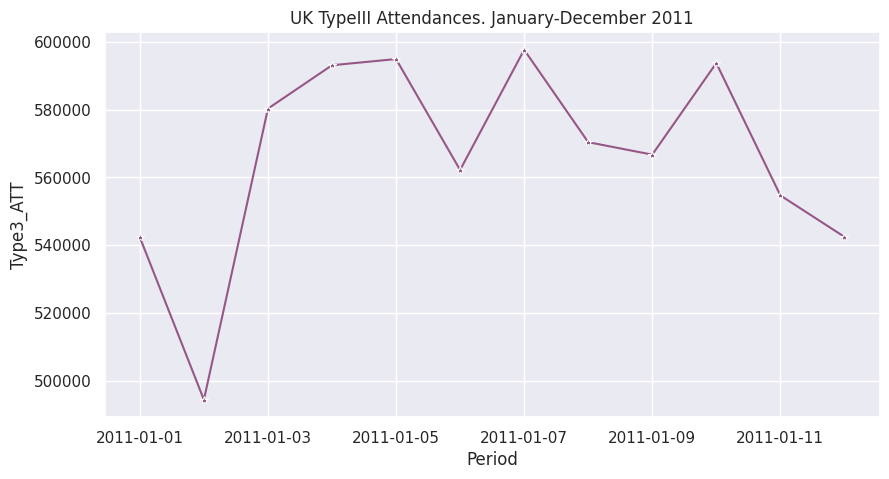

In [33]:
sns.set(rc={'figure.figsize':(10,5)})
ax = sns.lineplot(x='Period',y='Type3_ATT',data = AE_data_plot_2011, marker = '*', color = '#965786').set_title("UK TypeIII Attendances. January-December 2011") 
plt.savefig('Seaborn_gallery/Seaborn_plots/UK TypeIII Attendances UK year 2011.png', bbox_inches='tight') ## This saves the output plot successfully in the project folder
plt.show()

### 6. Adding data labels to previous Seaboarn chart 

- I can now include labels to each of the above data points displayins Type III Attendances in England for the Jan 2011 to Dec 2011 period.

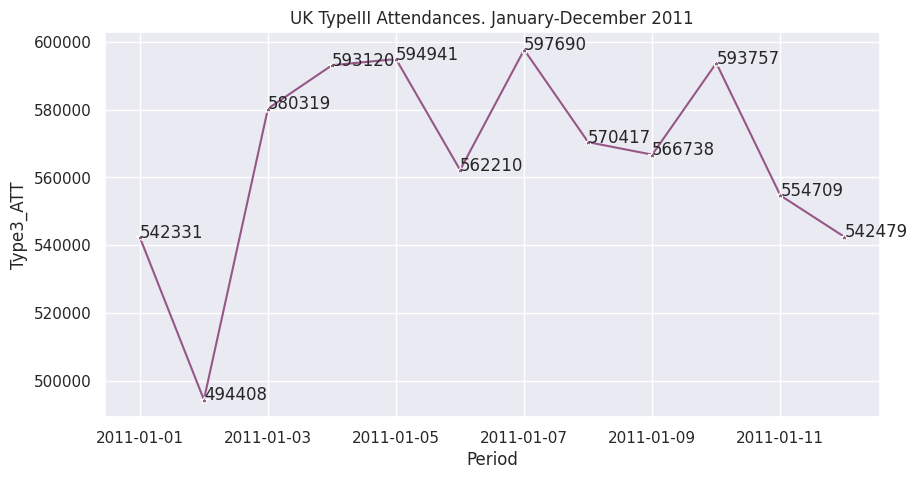

In [34]:
sns.set(rc={'figure.figsize':(10,5)})
ax = sns.lineplot(x='Period',y='Type3_ATT',data = AE_data_plot_2011, marker = '*', color = '#965786') 
ax.set(title = 'UK TypeIII Attendances. January-December 2011')
# Now we add labels to each data points from previous seaborn plot
for x,y in zip(AE_data_plot_2011['Period'],AE_data_plot_2011['Type3_ATT']):
    plt.text(x = x, # x coords position data label
             y = y-150, # y coords position data label, adjusted 150 below data point
             s ='{:.0f}'.format(y, # Format to ignore decimals
                                color = 'blue')) # Set line colour as blue
plt.savefig('Seaborn_gallery/Seaborn_plots/UK TypeIII Attendances UK year 2011 data labels.png', bbox_inches='tight') ## This saves the output plot successfully in the project folder
plt.show()
